## Car Sales Analysis

In [1]:
# Import necessary libraries
import os
import pandas as pd
import opendatasets as od
import seaborn as sns
import numpy as np

#### Load and store the Data

In [3]:
# Download dataset from Kaggle
dataset = 'https://www.kaggle.com/datasets/missionjee/car-sales-report'
od.download(dataset)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle username:Your Kaggle username:Your Kaggle Key:Dataset URL: https://www.kaggle.com/datasets/missionjee/car-sales-report


100%|██████████| 657k/657k [00:01<00:00, 627kB/s]

In [2]:
data_dir = 'data/carSalesData.csv'
os.listdir('data')

['carSalesData.csv']

In [3]:
# Load dataset
df = pd.read_csv(data_dir)
df

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


### Data Cleaning

_Since we are focused on the analysis of sales we may remove irrelevant columns_

In [4]:
column_to_remove = ['Car_id', 'Date', 'Customer Name', 'Phone', 'Dealer_No ']
df.drop(columns=column_to_remove, inplace=True)

In [5]:
df.head(5)

,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Body Style,Dealer_Region
0,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,SUV,Middletown
1,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,SUV,Aurora
2,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,Passenger,Greenville
3,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,SUV,Pasco
4,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,Hatchback,Janesville


#### Check data types

In [6]:
df.dtypes

Gender           object
Annual Income     int64
Dealer_Name      object
Company          object
Model            object
Engine           object
Transmission     object
Color            object
Price ($)         int64
Body Style       object
Dealer_Region    object
dtype: object

#### Check for duplicated rows

In [7]:
print(f'Number of duplicated rows: {df[df.duplicated()].shape[0]}\nNumber of total rows: {df.shape[0]}')

Number of duplicated rows: 215
Number of total rows: 23906


In [8]:
df = df.drop_duplicates()
print(f'Number of total rows: {df.shape[0]}')

Number of total rows: 23691


#### Check for missing values

In [9]:
df.count() # Since all the rows have the same number of values, there are no missing values

Gender           23691
Annual Income    23691
Dealer_Name      23691
Company          23691
Model            23691
Engine           23691
Transmission     23691
Color            23691
Price ($)        23691
Body Style       23691
Dealer_Region    23691
dtype: int64

In [10]:
df.isnull().sum() # Check for missing values

Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Body Style       0
Dealer_Region    0
dtype: int64

#### Detecting Outliers

<Axes: xlabel='Price ($)'>

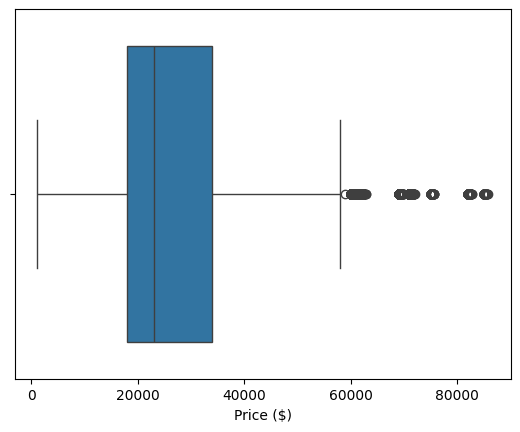

In [11]:
sns.boxplot(x=df['Price ($)'])

<Axes: xlabel='Annual Income'>

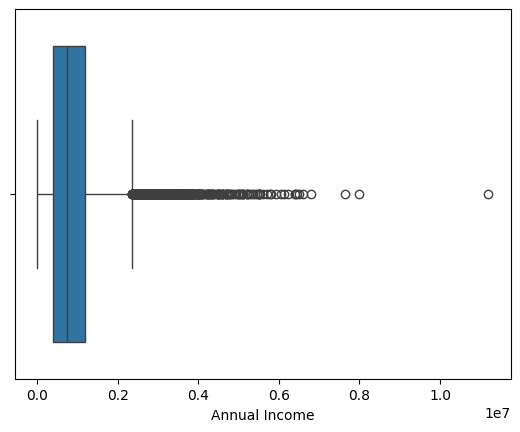

In [12]:
sns.boxplot(x=df['Annual Income'])

In [14]:
# IQR method for removing outliers
Q1 = df['Annual Income'].quantile(0.25)
Q3 = df['Annual Income'].quantile(0.75)
IQR = Q3 - Q1

In [15]:
# Removing the outliers
df_adjusted = df[~((df['Annual Income'] < (Q1 - 1.5 * IQR)) |(df['Annual Income'] > (Q3 + 1.5 * IQR)))]

In [16]:
print(f"Previous maximum Annual Income: {df['Annual Income'].max()}\nCurrent maximum Annual Income: {df_adjusted['Annual Income'].max()}")

Previous maximum Annual Income: 11200000
Current maximum Annual Income: 2360000


In [17]:
print(f"Previous shape: {df.shape}\nCurrent shape: {df_adjusted.shape}\nNumber of outliers rows dropped: {df.shape[0] - df_adjusted.shape[0]}")

Previous shape: (23691, 11)
Current shape: (22875, 11)
Number of outliers rows dropped: 816


### Exploratory Data Analysis (EDA)

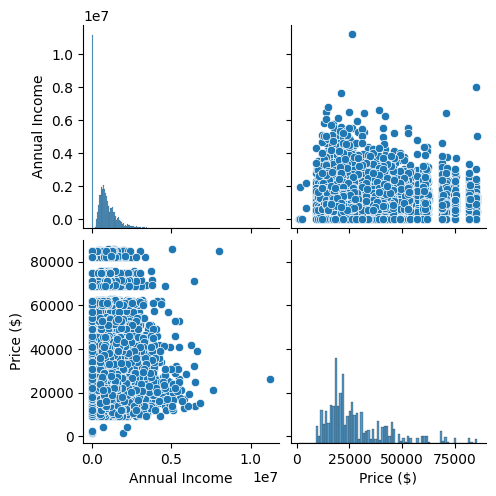

In [23]:
sns.pairplot(df)

__Lets update each 'object' dtype to category so that we can find the deeper relationship between each columns__

In [152]:
for col in df_adjusted.columns:
    if df_adjusted[col].dtype == 'object':
        df_adjusted[col] = df_adjusted[col].astype('category')
        df_adjusted[col] = df_adjusted[col].cat.codes

C:\Users\User\AppData\Local\Temp\ipykernel_25364\730270657.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_adjusted[col] = df_adjusted[col].astype('category')
C:\Users\User\AppData\Local\Temp\ipykernel_25364\730270657.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_adjusted[col] = df_adjusted[col].cat.codes
C:\Users\User\AppData\Local\Temp\ipykernel_25364\730270657.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [ ]:
df_adjusted.drop(columns=['Gender','Dealer_Name','Engine','Transmission','Dealer_Region'], inplace=True)

Using Heatmaps to find the correlation between each features...

<Axes: >

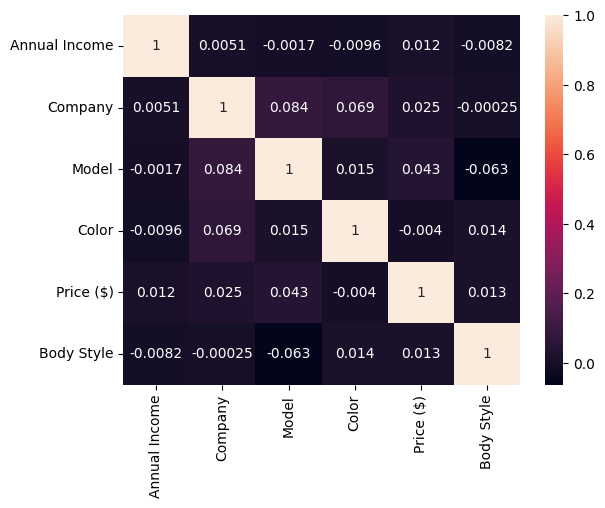

In [161]:
sns.heatmap(df_adjusted.corr(method='pearson'), annot=True)